# Prodaja stanovanj v Ljubljani

Projekt pri predmetu Programiranje 1, v katerem sem analizirala stanovanja, ki se trenutno prodajajo v Ljubljani.

## Priprava

Iz spletne strani http://www.nepremicnine.net sem dne 7.1.2017 pobrala podatke iz oglasov stanovanj, ki so se tistega dne še prodajala v Ljubljani. Podatke sem pobrala glede na predel Ljubljane v katerem se stanovanje nahaja in jih spravila v CSV datoteko.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

stanovanja = pd.read_csv('csv-datotekeP/stanovanja.csv', index_col='id')
bezigrad = pd.read_csv('csv-datotekeP/bezigrad.csv', index_col='id').drop('podrocje', axis=1)
center = pd.read_csv('csv-datotekeP/center.csv', index_col='id').drop('podrocje', axis=1)
mostePolje = pd.read_csv('csv-datotekeP/mostePolje.csv', index_col='id').drop('podrocje', axis=1)
siska = pd.read_csv('csv-datotekeP/siska.csv', index_col='id').drop('podrocje', axis=1)
vicRudnik = pd.read_csv('csv-datotekeP/vicRudnik.csv', index_col='id').drop('podrocje', axis=1)
tipi = pd.read_csv('csv-datotekeP/tipi.csv', index_col='id')

In [2]:
%matplotlib inline

In [3]:
stanovanja = stanovanja.drop_duplicates()
bezigrad = bezigrad.drop_duplicates()
center = center.drop_duplicates()
mostePolje = mostePolje.drop_duplicates()
vicRudnik = vicRudnik.drop_duplicates()
siska = siska.drop_duplicates()
tipi = tipi.loc[(tipi['tip'] == 'soba') | (tipi['tip'] == 'garsonjera') |
                (tipi['tip'] == '1-sobno') | (tipi['tip'] == '1,5-sobno') |
                (tipi['tip'] == '2-sobno') | (tipi['tip'] == '2,5-sobno') |
                (tipi['tip'] == '3-sobno') | (tipi['tip'] == '3,5-sobno') |
                (tipi['tip'] == '4-sobno') | (tipi['tip'] == '4,5-sobno') |
                (tipi['tip'] == '5 in večsobno')]

## Analiza

Pri analizi me bo zanimalo predvsem naslednje:
    * povprečna cena m^2 v posameznem predelu
    * kje se prodaja največ stanovanj
    * spreminjanje cen glede na različne faktorje
    * v katerem predelu Ljubljane lahko najdemo stanovanje katerega cena je najbolj primerna glede na ostale faktorje

### Povprečna cena m^2

Najprej poglejmo povprečno ceno stanovanja v Ljubljani.

In [4]:
stanovanja.mean()

leto          1974.770256
velikost        84.896503
cena        226415.775231
dtype: float64

Sestavimo tabelo, ki bo prikazovala povprečja po predelih Ljubljane.

In [5]:
prvi = ['Bezigrad', 'Center', 'Moste-Polje', 'Siska','Vic-Rudnik']
leta = [bezigrad['leto'].mean(), center['leto'].mean(), mostePolje['leto'].mean(), siska['leto'].mean(), vicRudnik['leto'].mean()]
velikosti = [bezigrad['velikost'].mean(), center['velikost'].mean(), mostePolje['velikost'].mean(), siska['velikost'].mean(), vicRudnik['velikost'].mean()]
cene = [bezigrad['cena'].mean(), center['cena'].mean(), mostePolje['cena'].mean(), siska['cena'].mean(), vicRudnik['cena'].mean()]
stevila = [bezigrad['ime'].count(),center['ime'].count(), mostePolje['ime'].count(), siska['ime'].count(), vicRudnik['ime'].count()]
povprecja = pd.DataFrame({
        'leto':pd.Series(leta, index=prvi),
        'velikost':pd.Series(velikosti, index=prvi),
        'cena':pd.Series(cene, index=prvi),
        'stevilo stanovanj':pd.Series(stevila, index=prvi)
    })
povprecja[['cena', 'leto', 'velikost']] = np.round(povprecja[['cena', 'leto', 'velikost']], 2)

In [6]:
povprecja

,cena,leto,stevilo stanovanj,velikost
Bezigrad,273660.69,1996.63,329,92.33
Center,324280.83,1921.24,172,111.28
Moste-Polje,140203.19,1970.47,112,64.42
Siska,171083.57,1982.56,227,76.31
Vic-Rudnik,151155.43,1980.16,135,64.59


Izračunamo povprečno ceno na m^2 po predelih Ljubljane.

In [7]:
povprecja['cena']/povprecja['velikost']

Bezigrad       2963.941189
Center         2914.098041
Moste-Polje    2176.392269
Siska          2241.954790
Vic-Rudnik     2340.229602
dtype: float64

In [8]:
# dodamo stolpec cena na m^2 v stanovanja
stanovanja['cena/velikost'] = pd.Series(stanovanja['cena']/stanovanja['velikost'], index=stanovanja.index)
bezigrad['cena/velikost'] = pd.Series(bezigrad['cena']/bezigrad['velikost'], index=bezigrad.index)
center['cena/velikost'] = pd.Series(center['cena']/center['velikost'], index=center.index)
mostePolje['cena/velikost'] = pd.Series(mostePolje['cena']/mostePolje['velikost'], index=mostePolje.index)
siska['cena/velikost'] = pd.Series(siska['cena']/siska['velikost'], index=siska.index)
vicRudnik['cena/velikost'] = pd.Series(vicRudnik['cena']/vicRudnik['velikost'], index=vicRudnik.index)

stanovanja['cena/velikost'] = stanovanja['cena/velikost'].round(2)
bezigrad['cena/velikost'] = bezigrad['cena/velikost'].round(2)
center['cena/velikost'] = center['cena/velikost'].round(2)
mostePolje['cena/velikost'] = mostePolje['cena/velikost'].round(2)
siska['cena/velikost'] = siska['cena/velikost'].round(2)
vicRudnik['cena/velikost'] = vicRudnik['cena/velikost'].round(2)

In [9]:
stanovanja.mean()

leto               1974.770256
velikost             84.896503
cena             226415.775231
cena/velikost      2662.411005
dtype: float64

Vidimo lahko, da se najdražja stanovanja glede na kvadraturo nahajajo v Bežigradu in v Centru, najcenejša pa v Mostah in Polju. Se pa na Bežigradu tudi prodaja največ stanovanj, ki so bila zgrajena v kasnejših letih, tako da rezultat ni tako presenetljiv.

### Prodaja glede na predel Ljubljane

In [10]:
stanovanja['podrocje'].value_counts()

Bezigrad       329
Siska          227
Center         172
Vic-Rudnik     135
Moste-Polje    112
dtype: int64

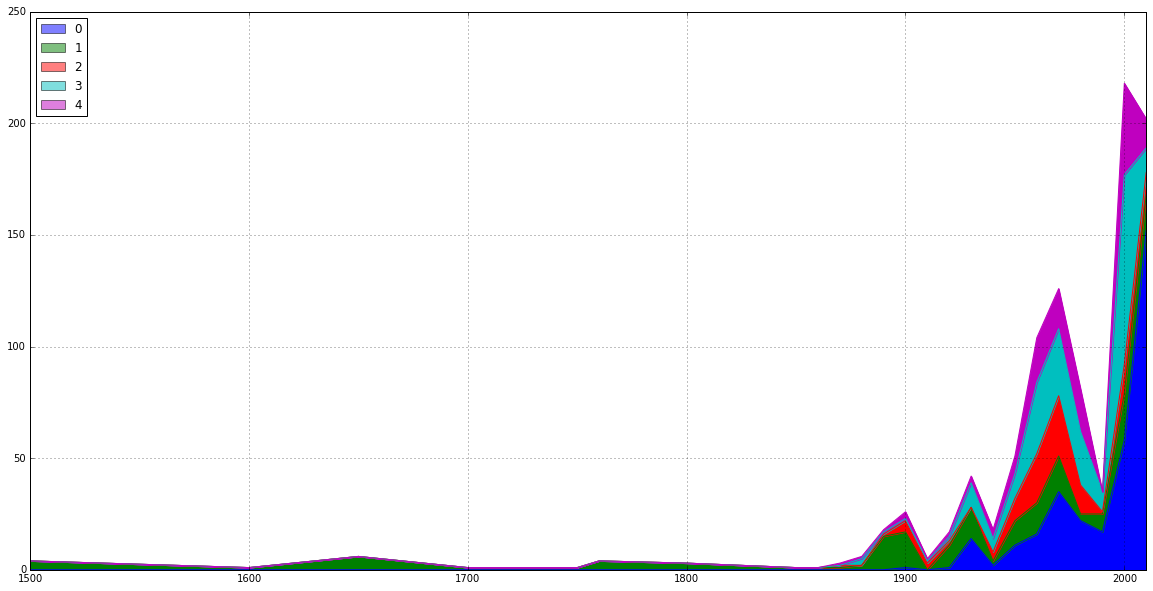

In [11]:
#graf, ki prikazuje razmerje števila stanovanj po letih izgradnje (v desetletjih) po predelu Ljubljane
pd.concat([(10*(bezigrad['leto']//10)).value_counts(),
           (10*(center['leto']//10)).value_counts(),
           (10*(mostePolje['leto']//10)).value_counts(),
           (10*(siska['leto']//10)).value_counts(),
           (10*(vicRudnik['leto']//10)).value_counts()], axis=1).plot(kind='area',figsize=(20,10))

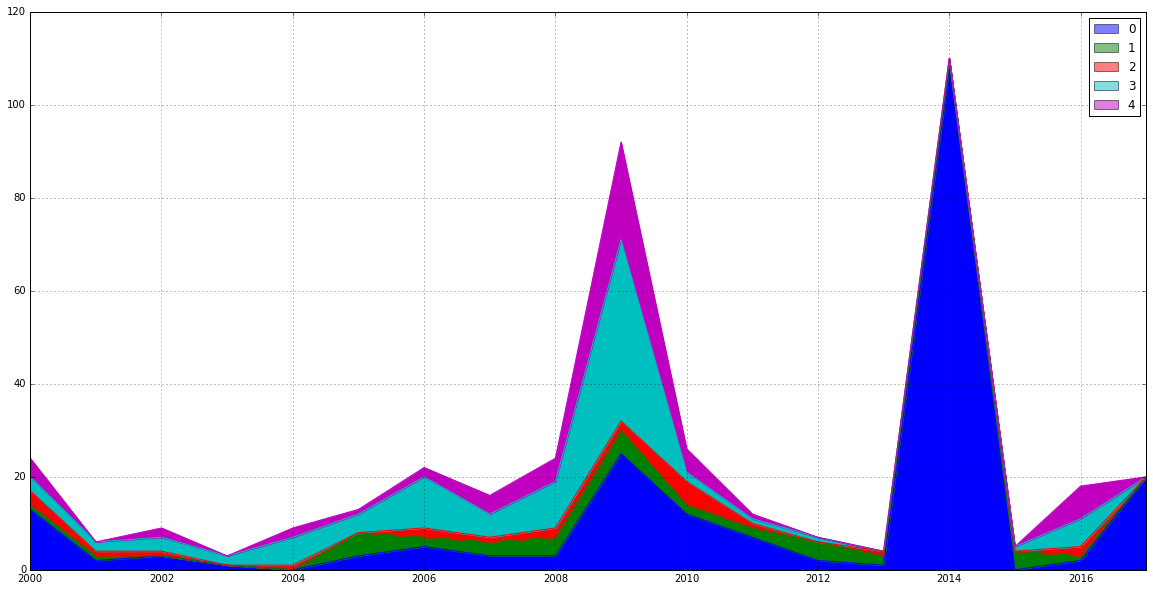

In [12]:
bezigrad.loc[bezigrad['leto'] >= 2000]['leto']
pd.concat([bezigrad.loc[bezigrad['leto'] >= 2000]['leto'].value_counts(),
           center.loc[center['leto'] >= 2000]['leto'].value_counts(),
           mostePolje.loc[mostePolje['leto'] >= 2000]['leto'].value_counts(),
           siska.loc[siska['leto'] >= 2000]['leto'].value_counts(),
           vicRudnik.loc[vicRudnik['leto'] >= 2000]['leto'].value_counts()], axis=1).plot(kind='area',figsize=(20,10))

Spodni graf prikazuje leto izgradnje stanovanj, ki se trenutno prodajajo. Vidimo, da so izgradnja nekaterih, predvsem se ta nahajajo v centru, sega tudi v leto 1500. Ta stanovanja so bila gotovo prenovljena vsaj enkrat v zadnjih nekaj desetletjih, vendar pa tega podatka nisem pobirala za stanovanja.

In [13]:
# najstarejše stanovanje
stanovanja['leto'].min()

1500

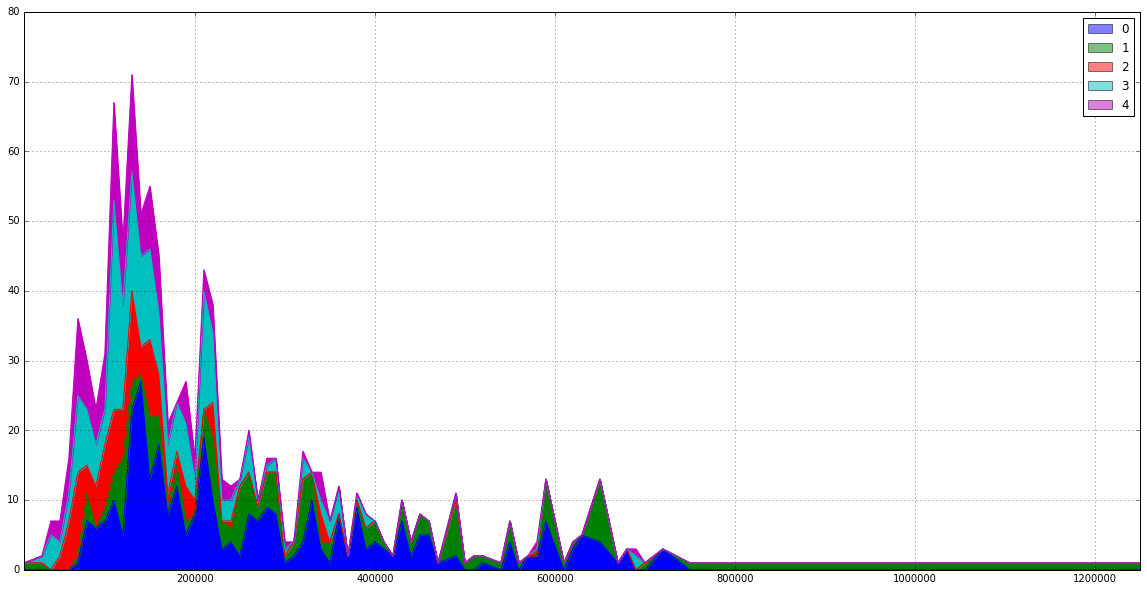

In [14]:
#graf, ki prikazuje število stanovanj v odvisnosti od cen (zaokrožena na 10 000) po predelu Ljubljane, v katerem se nahaja
pd.concat([(10000*(bezigrad['cena']//10000)).value_counts(),
           (10000*(center['cena']//10000)).value_counts(),
           (10000*(mostePolje['cena']//10000)).value_counts(),
           (10000*(siska['cena']//10000)).value_counts(),
           (10000*(vicRudnik['cena']//10000)).value_counts()], axis=1).plot(kind='area',figsize=(20,10))

Večinoma se cene gibljejo med 100 000 in 200 000. Zanimivo je tudi to, da se ta stanovanja večinoma nahajajo na Bežigradu, kjer je pa povprečna cena na m^2 najvišja. Dražja stanovanja se nahajajo v centru, kar pa ni tako presenetljivo. 

In [15]:
stanovanja_tipi = stanovanja.join(tipi, on=None)
stanovanja_tipi = stanovanja_tipi.dropna().drop_duplicates()
stanovanja_tipi.loc[(stanovanja_tipi['cena'] == stanovanja_tipi['cena'].max()) | (stanovanja_tipi['cena'] == stanovanja_tipi['cena'].min())] 

,ime,podrocje,nadstropje,leto,velikost,cena,cena/velikost,tip
id,,,,,,,,
6045782,"STARA LJ., NOVO ŠTIRISOBNO STANOVANJE V CENTRU",Center,3,2012,206.5,1250000,6053.27,4-sobno
6065051,"LJ. CENTER, KRISTANOVA ULICA",Center,5,1968,13.0,13990,1076.15,soba


Vidimo lahko, da je razpon cen prodaje stanovanj precej velik. Najdražje in prav tako najcenejše stanovanje se nahajata v centru Ljubljane, razlikujeta pa se za približno 5000€ na m^2. 

### Spreminjanje cen

In [16]:
soba = stanovanja_tipi.loc[stanovanja_tipi['tip'] == 'soba']
garsonjere = stanovanja_tipi.loc[stanovanja_tipi['tip'] == 'garsonjera']
sobno1 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '1-sobno']
sobno15 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '1,5-sobno']
sobno2 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '2-sobno']
sobno25 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '2,5-sobno']
sobno3 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '3-sobno']
sobno35 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '3,5-sobno']
sobno4 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '4-sobno']
sobno45 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '4,5-sobno']
sobno5 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '5 in večsobno']

In [17]:
# tabela cena/velikost po tipih
prvi = ['soba', 'garsonjere', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
leta = [soba['leto'].mean(), garsonjere['leto'].mean(), sobno1['leto'].mean(), sobno15['leto'].mean(), sobno2['leto'].mean(), sobno25['leto'].mean(), sobno3['leto'].mean(), sobno35['leto'].mean(), sobno4['leto'].mean(), sobno45['leto'].mean(), sobno5['leto'].mean()]
velikosti = [soba['velikost'].mean(), garsonjere['velikost'].mean(), sobno1['velikost'].mean(), sobno15['velikost'].mean(), sobno2['velikost'].mean(), sobno25['velikost'].mean(), sobno3['velikost'].mean(), sobno35['velikost'].mean(), sobno4['velikost'].mean(), sobno45['velikost'].mean(), sobno5['velikost'].mean()]
cene = [soba['cena'].mean(), garsonjere['cena'].mean(), sobno1['cena'].mean(), sobno15['cena'].mean(), sobno2['cena'].mean(), sobno25['cena'].mean(), sobno3['cena'].mean(), sobno35['cena'].mean(), sobno4['cena'].mean(), sobno45['cena'].mean(), sobno5['cena'].mean()]
stevila = [soba['ime'].count(),garsonjere['ime'].count(), sobno1['ime'].count(), sobno15['ime'].count(), sobno2['ime'].count(), sobno25['ime'].count(), sobno3['ime'].count(), sobno35['ime'].count(), sobno4['ime'].count(), sobno45['ime'].count(), sobno5['ime'].count()]
povprecja_tipi = pd.DataFrame({
        'leto':pd.Series(leta, index=prvi),
        'velikost':pd.Series(velikosti, index=prvi),
        'cena':pd.Series(cene, index=prvi),
        'stevilo stanovanj':pd.Series(stevila, index=prvi)
    })

povprecja_tipi['cena'] = povprecja_tipi['cena'].round(2)
povprecja_tipi['leto'] = povprecja_tipi['leto'].round(2)
povprecja_tipi['velikost'] = povprecja_tipi['velikost'].round(2)


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(povprecja_tipi['cena']/povprecja_tipi['velikost'])

soba             1868.709677
garsonjere       2760.392607
1-sobno          2528.665652
1,5-sobno        2654.256221
2-sobno          2488.544290
2,5-sobno        2571.055446
3-sobno          2671.431931
3,5-sobno        2270.162504
4-sobno          2986.348339
4,5-sobno        2737.771229
5 in večsobno    2448.475112
dtype: float64


In [18]:
print_full(povprecja_tipi)

                    cena     leto  stevilo stanovanj  velikost
soba            57930.00  1994.67                  3     31.00
garsonjere      86621.12  1983.89                 72     31.38
1-sobno         99680.00  1979.53                 55     39.42
1,5-sobno      118406.37  1978.97                 38     44.61
2-sobno        155359.82  1977.72                233     62.43
2,5-sobno      195683.03  1962.23                 66     76.11
3-sobno        241951.59  1974.43                237     90.57
3,5-sobno      226312.50  1969.79                 28     99.69
4-sobno        356898.49  1981.24                166    119.51
4,5-sobno      367874.32  1975.55                 11    134.37
5 in večsobno  444177.87  1941.37                 51    181.41


Vidimo lahko povprečne cene glede na tip stanovanja, ki nas zanima. Zanimivo je, da cena glede na število sob najprej narašča, ko pa enkrat začnemo gledati več kot 4-sobna stanovnja cene začnejo ponovno padati. 5 in večsobna stanovanja so cenejša celo od garsonjer in 1-sobnih stanovnj.

Pogledamo si lahko še, kako se cene spreminjajo z naraščanjem leta izgradnje.

In [19]:
stanovanja['leto'].min(), stanovanja['leto'].max()

(1500, 2017)

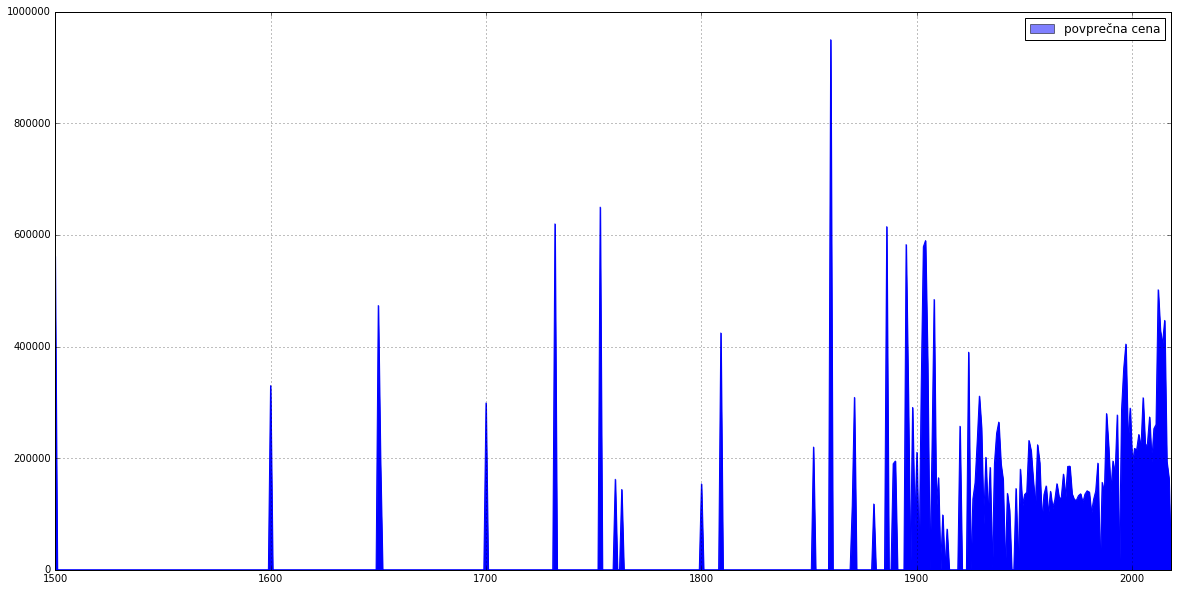

In [20]:
def povp_cena_na_leto(df):
    povp_cene = []
    leta = []
    for i in range(1500,2019):
        a = ''.join(['l', str(2015)])
        a = df.loc[df['leto'] == i]
        povp_cene.append(a['cena'].mean())
        leta.append(i)
    df1 = pd.DataFrame({'povprečna cena': pd.Series(povp_cene, index=leta)})
    return df1
    
povp_cena_na_leto(stanovanja).plot(kind='area',figsize=(20,10))

### Najbolj optimalno stanovanje

V tem razdelku nas bo zanimalo, koliko približno bi zapravili za stanovanje v posameznem predelu Ljubljane glede na kvadraturo. Gledali pa bomo na to ali kupujemo stanovanje zase(v poštev pridejo garsonjere in 1-sobna stanovanja), za dva(1,5- ali 2-sobna stanovanja) ali stanovanje kupuje družina(3- ali večsobno stanovanje).

#### Bežigrad

In [21]:
bezigrad_tipi = bezigrad.join(tipi, on=None)
b_1 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == 'garsonjera') | (bezigrad_tipi['tip'] == '1-sobno')]
b_2 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == '1,5-sobno') | (bezigrad_tipi['tip'] == '2-sobno')]
b_3 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == '2,5-sobno') | (bezigrad_tipi['tip'] == '3-sobno') |
                        (bezigrad_tipi['tip'] == '3,5-sobno') | (bezigrad_tipi['tip'] == '4-sobno') |
                        (bezigrad_tipi['tip'] == '4,5-sobno') | (bezigrad_tipi['tip'] == '5 in večsobno')]

In [22]:
prvi = ['b_1', 'b_2', 'b_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [b_1['cena/velikost'].min(), b_2['cena/velikost'].min(), b_3['cena/velikost'].min()]
max = [b_1['cena/velikost'].max(), b_2['cena/velikost'].max(), b_3['cena/velikost'].max()]
povprecje = [b_1['cena/velikost'].mean(), b_2['cena/velikost'].mean(), b_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].mean())
bez = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
bez

,max,min,povprecje
b_1,4500.00,1822.50,2800.241071
b_2,4143.09,1029.02,2888.946000
b_3,6051.20,633.33,2935.314421
garsonjera,4500.00,1822.50,3251.447500
1-sobno,3079.58,2065.22,2461.836250
"1,5-sobno",3406.33,2176.47,3022.098667
2-sobno,4143.09,1029.02,2852.631636
"2,5-sobno",2682.56,1686.75,2180.484444
3-sobno,5170.79,1179.25,2905.554382
"3,5-sobno",3461.54,1034.38,2363.532500


#### Center

In [23]:
center_tipi = center.join(tipi, on=None)
c_1 = center_tipi.loc[(center_tipi['tip'] == 'garsonjera') | (center_tipi['tip'] == '1-sobno')]
c_2 = center_tipi.loc[(center_tipi['tip'] == '1,5-sobno') | (center_tipi['tip'] == '2-sobno')]
c_3 = center_tipi.loc[(center_tipi['tip'] == '2,5-sobno') | (center_tipi['tip'] == '3-sobno') |
                        (center_tipi['tip'] == '3,5-sobno') | (center_tipi['tip'] == '4-sobno') |
                        (center_tipi['tip'] == '4,5-sobno') | (center_tipi['tip'] == '5 in večsobno')]

In [24]:
prvi = ['c_1', 'c_2', 'c_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [c_1['cena/velikost'].min(), c_2['cena/velikost'].min(), c_3['cena/velikost'].min()]
max = [c_1['cena/velikost'].max(), c_2['cena/velikost'].max(), c_3['cena/velikost'].max()]
povprecje = [c_1['cena/velikost'].mean(), c_2['cena/velikost'].mean(), c_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].mean())
cen = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
cen

,max,min,povprecje
c_1,3888.89,2442.53,3195.741000
c_2,6261.86,627.78,3120.456154
c_3,6637.17,897.23,3086.042783
garsonjera,3888.89,2442.53,3344.156667
1-sobno,3333.33,2571.43,2973.117500
"1,5-sobno",3750.00,1687.50,2718.750000
2-sobno,6261.86,627.78,3142.170000
"2,5-sobno",6637.17,2359.21,3627.289167
3-sobno,4132.46,1641.79,2942.528333
"3,5-sobno",3191.56,2335.77,2647.625000


#### Šiška

In [25]:
siska_tipi = siska.join(tipi, on=None)
s_1 = siska_tipi.loc[(siska_tipi['tip'] == 'garsonjera') | (siska_tipi['tip'] == '1-sobno')]
s_2 = siska_tipi.loc[(siska_tipi['tip'] == '1,5-sobno') | (siska_tipi['tip'] == '2-sobno')]
s_3 = siska_tipi.loc[(siska_tipi['tip'] == '2,5-sobno') | (siska_tipi['tip'] == '3-sobno') |
                        (siska_tipi['tip'] == '3,5-sobno') | (siska_tipi['tip'] == '4-sobno') |
                        (siska_tipi['tip'] == '4,5-sobno') | (siska_tipi['tip'] == '5 in večsobno')]

In [26]:
prvi = ['s_1', 's_2', 's_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [s_1['cena/velikost'].min(), s_2['cena/velikost'].min(), s_3['cena/velikost'].min()]
max = [s_1['cena/velikost'].max(), s_2['cena/velikost'].max(), s_3['cena/velikost'].max()]
povprecje = [s_1['cena/velikost'].mean(), s_2['cena/velikost'].mean(), s_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].mean())
sis = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
sis

,max,min,povprecje
s_1,3400.00,1585.01,2482.198333
s_2,4795.92,942.18,2435.651789
s_3,6915.42,481.18,2295.991761
garsonjera,3400.00,1585.01,2441.692414
1-sobno,3267.05,1913.04,2529.185200
"1,5-sobno",3450.00,2260.00,2838.386667
2-sobno,4795.92,942.18,2393.505116
"2,5-sobno",3020.45,1795.11,2386.598125
3-sobno,6915.42,1385.14,2315.498769
"3,5-sobno",2698.97,1547.03,2153.125294


#### Moste-Polje

In [27]:
mostePolje_tipi = mostePolje.join(tipi, on=None)
mp_1 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == 'garsonjera') | (mostePolje_tipi['tip'] == '1-sobno')]
mp_2 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == '1,5-sobno') | (mostePolje_tipi['tip'] == '2-sobno')]
mp_3 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == '2,5-sobno') | (mostePolje_tipi['tip'] == '3-sobno') |
                        (mostePolje_tipi['tip'] == '3,5-sobno') | (mostePolje_tipi['tip'] == '4-sobno') |
                        (mostePolje_tipi['tip'] == '4,5-sobno') | (mostePolje_tipi['tip'] == '5 in večsobno')]

In [28]:
prvi = ['mp_1', 'mp_2', 'mp_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [mp_1['cena/velikost'].min(), mp_2['cena/velikost'].min(), mp_3['cena/velikost'].min()]
max = [mp_1['cena/velikost'].max(), mp_2['cena/velikost'].max(), mp_3['cena/velikost'].max()]
povprecje = [mp_1['cena/velikost'].mean(), mp_2['cena/velikost'].mean(), mp_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].mean())
mosPol = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
mosPol

,max,min,povprecje
mp_1,3222.75,1984.73,2637.595429
mp_2,2591.17,1242.24,2166.813485
mp_3,4229.93,1194.43,2124.492208
garsonjera,3222.75,2366.67,2712.653200
1-sobno,3111.43,1984.73,2449.951000
"1,5-sobno",2500.00,1552.63,2073.902500
2-sobno,2591.17,1242.24,2187.460370
"2,5-sobno",2488.04,1712.00,2079.550000
3-sobno,3062.50,1194.43,2067.762333
"3,5-sobno",2238.81,1686.34,1870.496667


#### Vič-Rudnik

In [29]:
vicRudnik_tipi = vicRudnik.join(tipi, on=None)
vr_1 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == 'garsonjera') | (vicRudnik_tipi['tip'] == '1-sobno')]
vr_2 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == '1,5-sobno') | (vicRudnik_tipi['tip'] == '2-sobno')]
vr_3 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == '2,5-sobno') | (vicRudnik_tipi['tip'] == '3-sobno') |
                        (vicRudnik_tipi['tip'] == '3,5-sobno') | (vicRudnik_tipi['tip'] == '4-sobno') |
                        (vicRudnik_tipi['tip'] == '4,5-sobno') | (vicRudnik_tipi['tip'] == '5 in večsobno')]

In [30]:
prvi = ['vr_1', 'vr_2', 'vr_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [vr_1['cena/velikost'].min(), vr_2['cena/velikost'].min(), vr_3['cena/velikost'].min()]
max = [vr_1['cena/velikost'].max(), vr_2['cena/velikost'].max(), vr_3['cena/velikost'].max()]
povprecje = [vr_1['cena/velikost'].mean(), vr_2['cena/velikost'].mean(), vr_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].mean())
vicRud = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
vicRud

,max,min,povprecje
vr_1,3222.75,1585.01,2514.237241
vr_2,4795.92,1500.00,2376.362294
vr_3,6915.42,1453.17,2212.332935
garsonjera,3222.75,1585.01,2539.286316
1-sobno,3083.33,1987.77,2466.644000
"1,5-sobno",3391.52,1552.63,2331.304286
2-sobno,4795.92,1500.00,2383.002421
"2,5-sobno",3018.58,1800.00,2283.413333
3-sobno,2980.47,1645.24,2213.050556
"3,5-sobno",2193.88,1686.34,2021.726667


In [31]:
pd.concat([bez[0:3], cen[0:3], sis[0:3], mosPol[0:3], vicRud[0:3]])

,max,min,povprecje
b_1,4500.00,1822.50,2800.241071
b_2,4143.09,1029.02,2888.946000
b_3,6051.20,633.33,2935.314421
c_1,3888.89,2442.53,3195.741000
c_2,6261.86,627.78,3120.456154
c_3,6637.17,897.23,3086.042783
s_1,3400.00,1585.01,2482.198333
s_2,4795.92,942.18,2435.651789
s_3,6915.42,481.18,2295.991761
mp_1,3222.75,1984.73,2637.595429


Zgoraj lahko vidimo, da če kupujemo stanovanje za:
    * eno osebo:
        -> najcenejše: Šiška oz. Vič-Rudnik
        -> v povprečju najcenejše: Šiška
    * dve osebi:
        -> najcenejše: Center
        -> v povprečju najcenejše: Moste-Polje
    * družina:
        -> najcenejše: Šiška
        -> v povprečju najcenejše: Moste-Polje